# Controlling a system

**automated irrigation system**

*   input: hydration level of soil
*   desired reference: "kinda damp"
*   disturbances: rain (do nothing until water evaporates); sun (output water); fauna



In [57]:
# "magic" commands, prefaced with "%", changes settings in the notebook

# this ensures plots are embedded in notebook web page
%matplotlib inline

# pdb = Python debugger, so this command turns the debugger OFF
%pdb off

# numpy = numerical Python, implements arrays (/ matrices)
import numpy as np
# limit number of decimal places printed for floating-point numbers
np.set_printoptions(precision=3)

# scipy = scientific Python, implements operations on arrays / matrices
import scipy as sp
# linalg = linear algebra, implements eigenvalues, matrix inverse, etc
from scipy import linalg as la
# optimize = optimization, root finding, etc
from scipy import optimize as op

# produce matlab-style plots
import matplotlib as mpl
# increase font size on plots
mpl.rc('font',**{'size':18})
# use LaTeX to render symbols
mpl.rc('text',usetex=False)
# animation
from matplotlib import animation as ani
# Matlab-style plotting
import matplotlib.pyplot as plt

# symbolic computation, i.e. computer algebra (like Mathematica, Wolfram Alpha)
import sympy as sym
def Jacobian(g,y,d=1e-4):
  """
  approximate derivative via finite-central-differences 

  input:
    g - function - g : R^n -> R^m
    y - n array
    (optional)
    d - scalar - finite differences displacement parameter

  output:
    Dg(y) - m x n - approximation of Jacobian of g at y
  """
  # given $g:\mathbb{R}^n\rightarrow\mathbb{R}^m$:
  # $$D_y g(y)e_j \approx \frac{1}{2\delta}(g(y+\delta e_j) - g(y - \delta e_j)),\ \delta\ll 1$$
  e = np.identity(len(y))
  Dyg = []
  for j in range(len(y)):
      Dyg.append((.5/d)*(g(y+d*e[j]) - g(y-d*e[j])))
  return np.array(Dyg).T

def numerical_simulation(f,t,x,t0=0.,dt=1e-4,ut=None,ux=None,utx=None,return_u=False):
  """
  simulate x' = f(x,u) 

  input:
    f : R x X x U --> X - vector field
      X - state space (must be vector space)
      U - control input set
    t - scalar - final simulation time
    x - initial condition; element of X

    (optional:)
    t0 - scalar - initial simulation time
    dt - scalar - stepsize parameter
    return_u - bool - whether to return u_

    (only one of:)
    ut : R --> U
    ux : X --> U
    utx : R x X --> U

  output:
    t_ - N array - time trajectory
    x_ - N x X array - state trajectory
    (if return_u:)
    u_ - N x U array - state trajectory
  """
  t_,x_,u_ = [t0],[x],[]
  
  inputs = sum([1 if u is not None else 0 for u in [ut,ux,utx]])
  assert inputs <= 1, "more than one of ut,ux,utx defined"

  if inputs == 0:
    assert not return_u, "no input supplied"
  else:
    if ut is not None:
      u = lambda t,x : ut(t)
    elif ux is not None:
      u = lambda t,x : ux(x)
    elif utx is not None:
      u = lambda t,x : utx(t,x)

  while t_[-1]+dt < t:
    if inputs == 0:
      _t,_x = t_[-1],x_[-1]
      dx = f(t_[-1],x_[-1]) * dt
    else:
      _t,_x,_u = t_[-1],x_[-1],u(t_[-1],x_[-1])
      dx = f(_t,_x,_u) * dt
      u_.append( _u )

    x_.append( _x + dx )
    t_.append( _t + dt )

  if return_u:
    return np.asarray(t_),np.asarray(x_),np.asarray(u_)
  else:
    return np.asarray(t_),np.asarray(x_)

Automatic pdb calling has been turned OFF


## plotting output from transfer function

$G_{yv}$


In [59]:
b = 1
a = 1
k_i = 1 
k_p = 1
x0 = np.array([5,0])

A = np.array([[0,1],[-b*k_i,-a-b*k_p]])
B = np.array([[0],[1]])

def f(t,x):
  u = 1
  xdot = np.squeeze(np.dot(x, A.T) + u * B.T)
  return xdot 

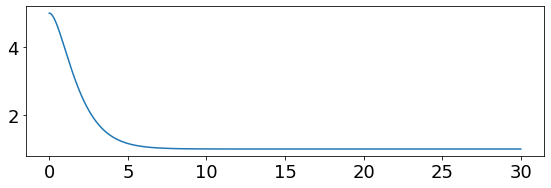

In [61]:
t = 30. # sec; simulation duration

t_,x_ = numerical_simulation(f,t,x0)

y_,z_ = x_.T

v_ = np.dot(np.array([0, b]),x_) 

plt.figure(figsize=(8,8))

ax = plt.subplot(3,1,1)
ax.plot(t_,y_)
ylim = ax.get_ylim()
# for _ in [5., 20.]:
#   ax.plot(_*np.ones(2),ylim,'k--')
# ax.plot(t_,v_r(t_),'k--')
# ax.set_ylim(ylim)
# ax.set_xticklabels([])
# ax.set_ylabel(r'velocity $y$')

# ax = plt.subplot(3,1,2)
# ax.plot(t_,v(t_))
# ylim = ax.get_ylim()
# for _ in [5., 20.]:
#   ax.plot(_*np.ones(2),ylim,'k--')
# ax.set_ylim(ylim)
# ax.set_xticklabels([])
# ax.set_ylabel(r'external force $v$')

# ax = plt.subplot(3,1,3)
# ax.plot(t_,u(t_,y_,z_))
# ylim = ax.get_ylim()
# for _ in [5., 20.]:
#   ax.plot(_*np.ones(2),ylim,'k--')
# ax.set_ylim(ylim)
# ax.set_ylabel(r'input $u$')

# ax.set_xlabel(r'time $t$ (sec)')

plt.tight_layout(); # semicolon suppresses text printout

Text(0, 0.5, 'y(t)')

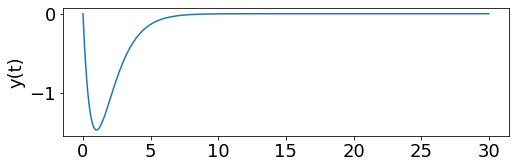

In [67]:
v_ = np.dot(x_,np.array([0, b]))

plt.figure(figsize=(8,8))

ax = plt.subplot(3,1,1)
ax.plot(t_,v_)
ax.set_ylabel('y(t)')